In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7, 8.27)})

### Simulation of Core - Periphery 

For $R$ regions, the system simplifies to

\begin{align}
    Y_r &= \delta \lambda_r W_r + (1-\delta) \phi_r \\
    I_r &= \left[ \sum^{R}_{s=1} \lambda_s \left( T_{s, r} \cdot W_{s,r} \right)^{1-\epsilon} \right]^{\frac{1}{1-\epsilon}} \\
    W_r &= \left[ \sum^{R}_{s=1} Y_s \left( T_{s, r} / I_{s,r} \right)^{1-\epsilon} \right]^{\frac{1}{\epsilon}}
\end{align}

were $\lambda_r$ is the distribution of the mobility force and $T_{s, r} \propto D(s, r)$, hence $R = 2 \implies D(s, r) = 1$

#### Base scenario

In [23]:
delta = 0.4
eps = 5
L = 1
phi = 0.5
sigma = 1e-4

In [88]:
model = TwoRegionModel(
    delta = 0.4
    eps = 5
    L = 1
    phi = 0.5
    sigma = 1e-4,
    verbose = 0
)

In [89]:
model.solve(0, 1.5)

[(1.106281460039296, 1.0), (0.3, 0.7), (1.5, 1.0), (0.9406523191481266, 1.0)]

#### Relative real wage, $\frac{w_1}{w_2}(\lambda | T)$

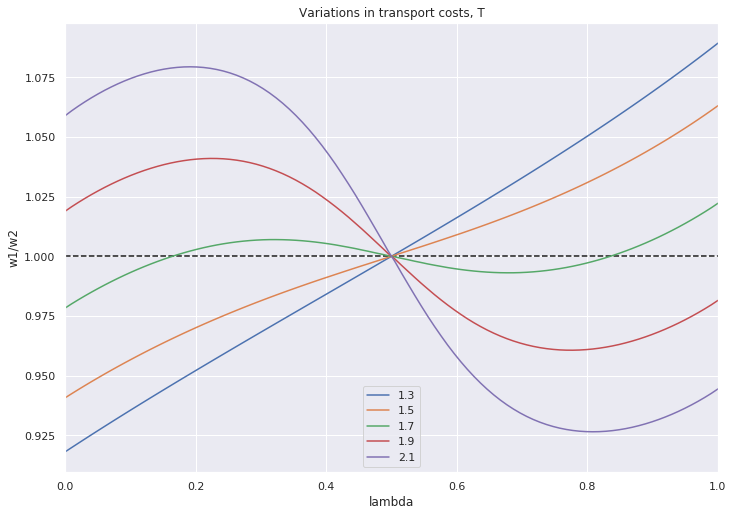

In [90]:
Ts = [1.3, 1.5, 1.7, 1.9, 2.1]
n = 100
lams = np.linspace(0, 1, n)

df = pd.DataFrame(index=lams, columns=Ts)

for T in Ts:
    wage_r = []

    for l in lams:

        _, _, _, wages = model.solve(l, T)

        wage_r.append(wages[0] / wages[1])
        
    df[T] = wage_r    

df.plot()
plt.ylabel("w1/w2")
plt.xlabel("lambda")
plt.title("Variations in transport costs, T")
plt.hlines(1, xmin=0, xmax=1, linestyle="--")
plt.xlim(0, 1)
plt.show()
